In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col = 'customer_id')
df.head()

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,...,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT,label
customer_id,,,,,,,,,,,,,,,,,,,,,
0,6,2,2,3,1,1,4,1,1,5,...,2,2,2,7,7,7,7,7,1000070.0,0
2,11,2,2,4,1,1,7,1,1,11,...,2,2,2,7,7,7,7,7,1000080.0,1
3,11,2,2,1,1,1,10,1,1,11,...,2,2,2,7,7,5,5,5,1000200.0,0
4,5,5,2,1,1,1,4,4,1,8,...,5,3,2,6,6,6,5,5,1000240.0,0
6,2,2,2,1,1,1,1,1,1,2,...,2,2,2,2,2,2,2,2,1000000.0,1


#### 1. Khách hàng có nhiều khoản vay hoặc thẻ tín dụng có xu hướng khó khăn hơn trong việc thanh toán nợ đúng hạn ?

In [3]:
df[df['label']==1][['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']].describe()

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT
count,3644.000000,3644.000000,3644.000000
mean,4.606476,3.322997,2.025247
std,3.060184,2.356903,0.265955
min,2.000000,2.000000,2.000000
25%,2.000000,2.000000,2.000000
50%,5.000000,2.000000,2.000000
75%,7.000000,5.000000,2.000000
max,23.000000,17.000000,5.000000


In [4]:
df[df['label']==0][['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']].describe()

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT
count,16356.000000,16356.000000,16356.000000
mean,7.588347,4.549890,2.068293
std,3.151968,3.148154,0.442383
min,2.000000,2.000000,2.000000
25%,5.000000,2.000000,2.000000
50%,8.000000,4.000000,2.000000
75%,8.000000,5.000000,2.000000
max,26.000000,23.000000,8.000000


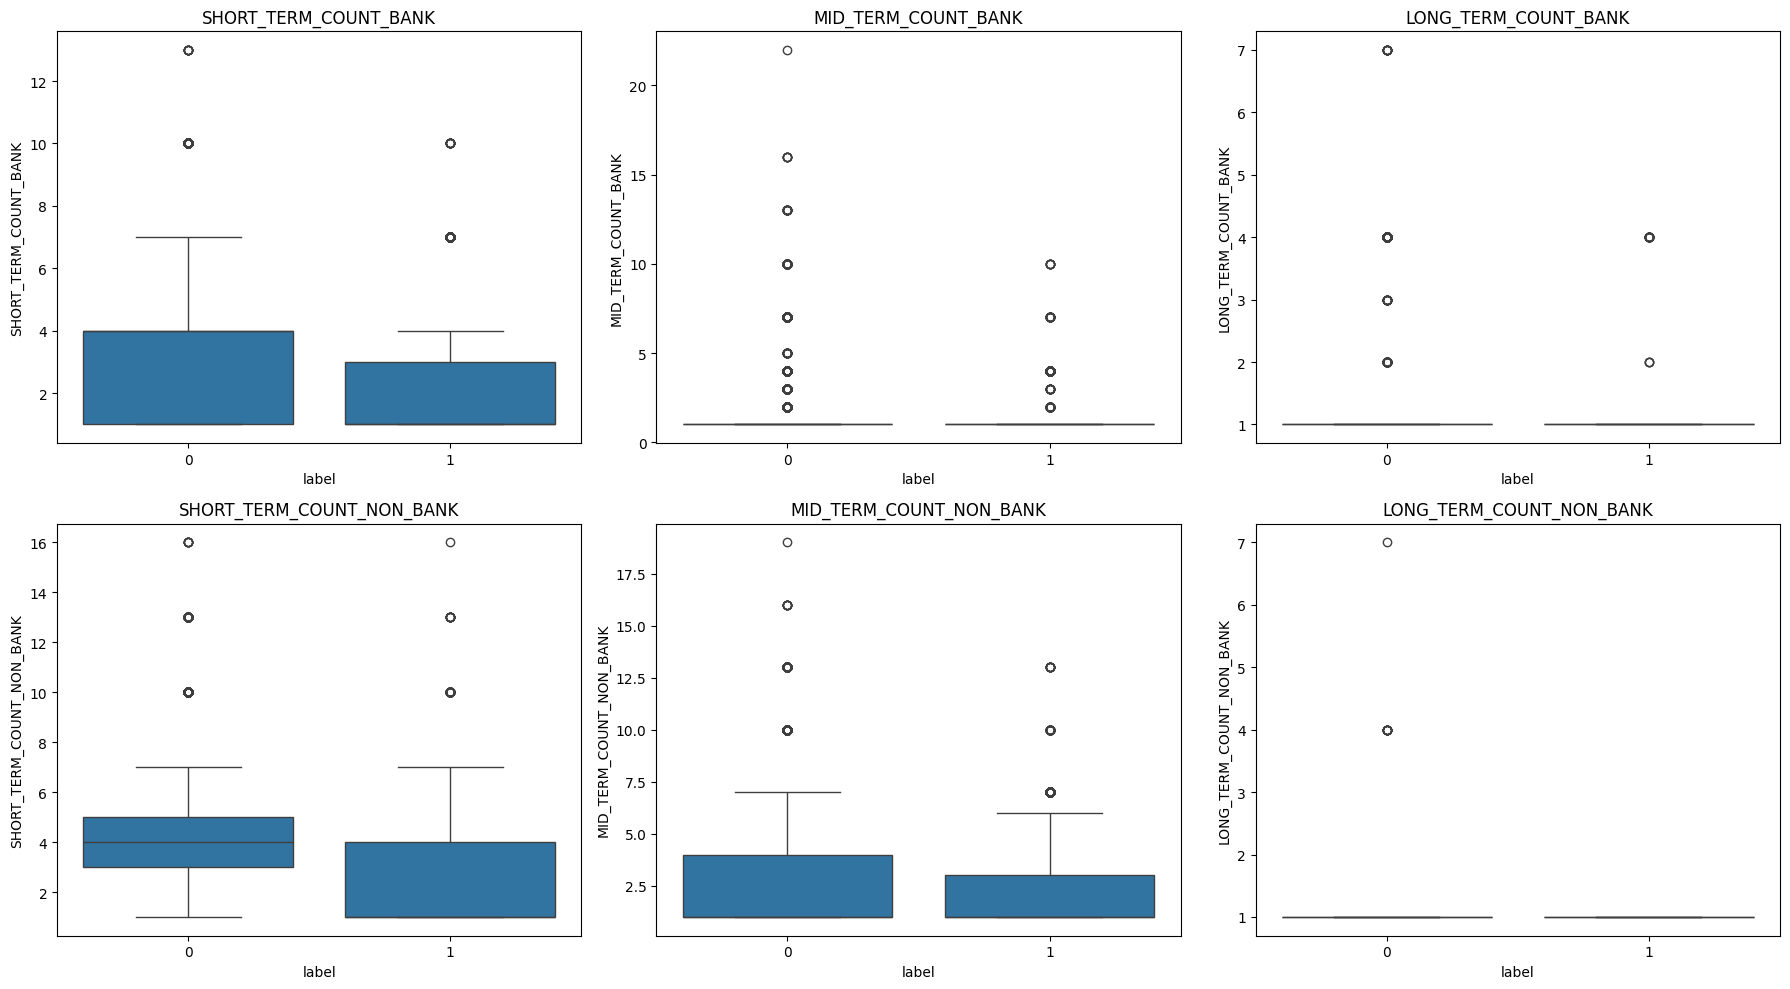

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x=df['label'], y=df['SHORT_TERM_COUNT_BANK'], ax=axes[0, 0])
axes[0, 0].set_title('SHORT_TERM_COUNT_BANK')

sns.boxplot(x=df['label'], y=df['MID_TERM_COUNT_BANK'], ax=axes[0, 1])
axes[0, 1].set_title('MID_TERM_COUNT_BANK')

sns.boxplot(x=df['label'], y=df['LONG_TERM_COUNT_BANK'], ax=axes[0, 2])
axes[0, 2].set_title('LONG_TERM_COUNT_BANK')

sns.boxplot(x=df['label'], y=df['SHORT_TERM_COUNT_NON_BANK'], ax=axes[1, 0])
axes[1, 0].set_title('SHORT_TERM_COUNT_NON_BANK')

sns.boxplot(x=df['label'], y=df['MID_TERM_COUNT_NON_BANK'], ax=axes[1, 1])
axes[1, 1].set_title('MID_TERM_COUNT_NON_BANK')

sns.boxplot(x=df['label'], y=df['LONG_TERM_COUNT_NON_BANK'], ax=axes[1, 2])
axes[1, 2].set_title('LONG_TERM_COUNT_NON_BANK')

plt.tight_layout()
plt.show()

In [6]:
df[['LONG_TERM_COUNT', 'MID_TERM_COUNT', 'SHORT_TERM_COUNT', 'label']].corrwith(df['label'])

LONG_TERM_COUNT    -0.039927
MID_TERM_COUNT     -0.154958
SHORT_TERM_COUNT   -0.344630
label               1.000000
dtype: float64

##### => Những khách hàng có ít khoản vay ngắn hạn có xu hướng trả quá hạn 

#### 2. Khách hàng có dư nợ càng cao, càng có khả năng cao hơn gặp phải tình trạng chậm trả nợ ?

In [7]:
df[df['label']==1][['OUTSTANDING_BAL_ALL_CURRENT', 'OUTSTANDING_BAL_CC_CURRENT','OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_LOAN_3M',
       'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M',
       'OUTSTANDING_BAL_LOAN_12M', 'OUTSTANDING_BAL_CC_3M',
       'OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M',
       'OUTSTANDING_BAL_CC_12M', 'OUTSTANDING_BAL_ALL_3M',
       'OUTSTANDING_BAL_ALL_6M', 'OUTSTANDING_BAL_ALL_9M',
       'OUTSTANDING_BAL_ALL_12M', 'OUTSTANDING_BAL_LOAN_3M_6M',
       'OUTSTANDING_BAL_LOAN_6M_9M', 'OUTSTANDING_BAL_LOAN_9M_12M',
       'OUTSTANDING_BAL_LOAN_6M_12M', 'OUTSTANDING_BAL_LOAN_3M_12M',
       'OUTSTANDING_BAL_CC_3M_6M', 'OUTSTANDING_BAL_CC_6M_9M',
       'OUTSTANDING_BAL_CC_9M_12M', 'OUTSTANDING_BAL_CC_6M_12M',
       'OUTSTANDING_BAL_CC_3M_12M', 'OUTSTANDING_BAL_ALL_3M_6M',
       'OUTSTANDING_BAL_ALL_6M_9M', 'OUTSTANDING_BAL_ALL_9M_12M',
       'OUTSTANDING_BAL_ALL_6M_12M', 'OUTSTANDING_BAL_ALL_3M_12M']].describe()

,OUTSTANDING_BAL_ALL_CURRENT,OUTSTANDING_BAL_CC_CURRENT,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,...,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M
count,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,...,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03
mean,1.000448e+06,1.000100e+06,1.000329e+06,1.000279e+06,1.000280e+06,1.000288e+06,1.000263e+06,1.000082e+06,1.000075e+06,1.000071e+06,...,1.000003e+06,1.000003e+06,1.000003e+06,1.000004e+06,1.000006e+06,1.000009e+06,1.000008e+06,1.000008e+06,1.000010e+06,1.000014e+06
std,2.563016e+03,3.286234e+02,2.233483e+03,1.921096e+03,2.940240e+03,3.244762e+03,2.970672e+03,2.848350e+02,2.571962e+02,2.885758e+02,...,8.449639e+00,7.933432e+00,7.682753e+00,9.494028e+00,1.391275e+01,7.071244e+00,5.979514e+00,5.447327e+00,7.747491e+00,1.324903e+01
min,1.000000e+06,9.999900e+05,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05,9.999900e+05,...,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05
25%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
50%,1.000090e+06,1.000000e+06,1.000050e+06,1.000030e+06,1.000025e+06,1.000022e+06,1.000021e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000010e+06,1.000010e+06,1.000011e+06,1.000011e+06,1.000011e+06
75%,1.000380e+06,1.000078e+06,1.000230e+06,1.000170e+06,1.000142e+06,1.000126e+06,1.000111e+06,1.000050e+06,1.000038e+06,1.000034e+06,...,1.000010e+06,1.000010e+06,1.000011e+06,1.000011e+06,1.000011e+06,1.000013e+06,1.000014e+06,1.000013e+06,1.000018e+06,1.000022e+06
max,1.101190e+06,1.009010e+06,1.097530e+06,1.065153e+06,1.146667e+06,1.156444e+06,1.156750e+06,1.007987e+06,1.007750e+06,1.007981e+06,...,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06


In [8]:
df[df['label']==0][['OUTSTANDING_BAL_ALL_CURRENT', 'OUTSTANDING_BAL_CC_CURRENT','OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_LOAN_3M',
       'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M',
       'OUTSTANDING_BAL_LOAN_12M', 'OUTSTANDING_BAL_CC_3M',
       'OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M',
       'OUTSTANDING_BAL_CC_12M', 'OUTSTANDING_BAL_ALL_3M',
       'OUTSTANDING_BAL_ALL_6M', 'OUTSTANDING_BAL_ALL_9M',
       'OUTSTANDING_BAL_ALL_12M', 'OUTSTANDING_BAL_LOAN_3M_6M',
       'OUTSTANDING_BAL_LOAN_6M_9M', 'OUTSTANDING_BAL_LOAN_9M_12M',
       'OUTSTANDING_BAL_LOAN_6M_12M', 'OUTSTANDING_BAL_LOAN_3M_12M',
       'OUTSTANDING_BAL_CC_3M_6M', 'OUTSTANDING_BAL_CC_6M_9M',
       'OUTSTANDING_BAL_CC_9M_12M', 'OUTSTANDING_BAL_CC_6M_12M',
       'OUTSTANDING_BAL_CC_3M_12M', 'OUTSTANDING_BAL_ALL_3M_6M',
       'OUTSTANDING_BAL_ALL_6M_9M', 'OUTSTANDING_BAL_ALL_9M_12M',
       'OUTSTANDING_BAL_ALL_6M_12M', 'OUTSTANDING_BAL_ALL_3M_12M']].describe()

,OUTSTANDING_BAL_ALL_CURRENT,OUTSTANDING_BAL_CC_CURRENT,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,...,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M
count,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,...,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04
mean,1.001016e+06,1.000244e+06,1.000770e+06,1.000655e+06,1.000661e+06,1.000647e+06,1.000597e+06,1.000214e+06,1.000207e+06,1.000195e+06,...,1.000004e+06,1.000005e+06,1.000005e+06,1.000006e+06,1.000008e+06,1.000011e+06,1.000012e+06,1.000011e+06,1.000013e+06,1.000016e+06
std,4.050300e+03,5.235076e+02,3.946370e+03,3.190328e+03,3.337905e+03,3.487820e+03,2.849352e+03,4.888139e+02,4.893563e+02,4.877138e+02,...,1.014237e+01,9.821033e+00,9.614140e+00,1.126187e+01,1.501764e+01,3.724112e+00,2.466006e+00,1.852969e+00,4.213088e+00,9.180986e+00
min,1.000010e+06,9.999900e+05,1.000010e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05,9.999900e+05,...,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05
25%,1.000130e+06,1.000000e+06,1.000090e+06,1.000067e+06,1.000057e+06,1.000047e+06,1.000040e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,1.000009e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06
50%,1.000340e+06,1.000033e+06,1.000210e+06,1.000160e+06,1.000145e+06,1.000128e+06,1.000113e+06,1.000027e+06,1.000022e+06,1.000019e+06,...,1.000009e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000011e+06,1.000011e+06,1.000013e+06,1.000013e+06
75%,1.000850e+06,1.000290e+06,1.000500e+06,1.000420e+06,1.000410e+06,1.000390e+06,1.000368e+06,1.000237e+06,1.000217e+06,1.000193e+06,...,1.000011e+06,1.000012e+06,1.000013e+06,1.000015e+06,1.000016e+06,1.000013e+06,1.000013e+06,1.000013e+06,1.000017e+06,1.000020e+06
max,1.169190e+06,1.010220e+06,1.169190e+06,1.150050e+06,1.150055e+06,1.166587e+06,1.179359e+06,1.014880e+06,1.014692e+06,1.014466e+06,...,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06


Text(0.5, 1.0, 'OUTSTANDING_BAL_CC_CURRENT')

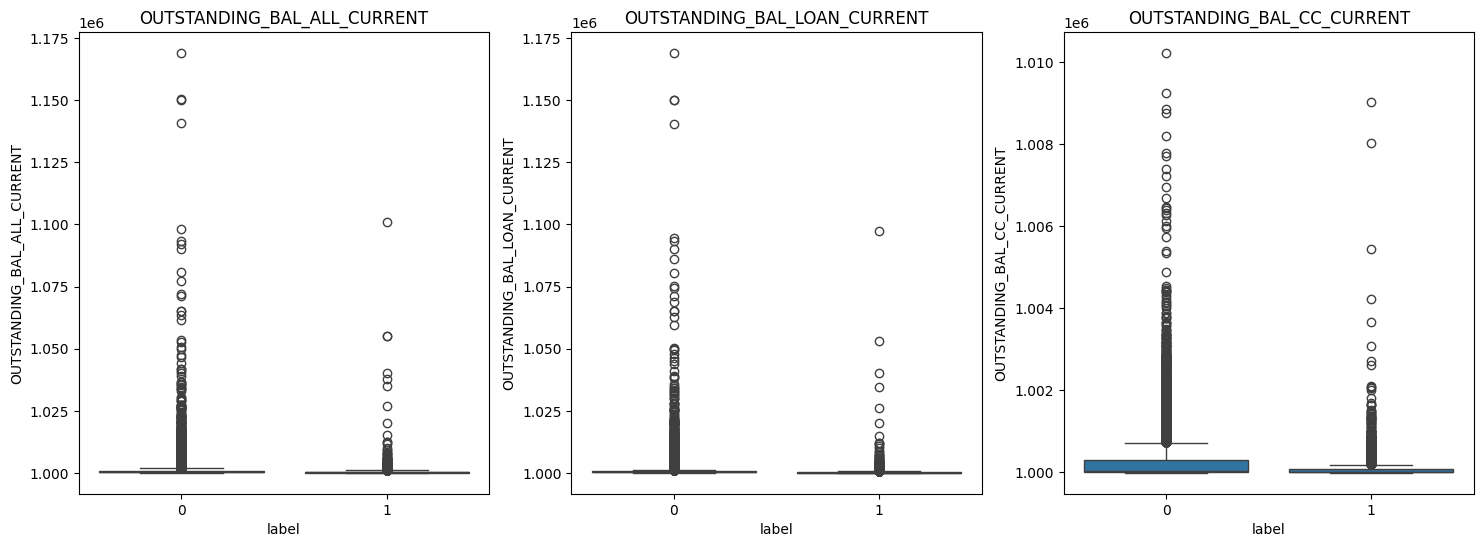

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['label'], y=df['OUTSTANDING_BAL_ALL_CURRENT'], ax=ax[0])
ax[0].set_title('OUTSTANDING_BAL_ALL_CURRENT')

sns.boxplot(x=df['label'], y=df['OUTSTANDING_BAL_LOAN_CURRENT'], ax=ax[1])
ax[1].set_title('OUTSTANDING_BAL_LOAN_CURRENT')

sns.boxplot(x=df['label'], y=df['OUTSTANDING_BAL_CC_CURRENT'], ax=ax[2])
ax[2].set_title('OUTSTANDING_BAL_CC_CURRENT')


In [34]:
((df['OUTSTANDING_BAL_ALL_6M']-1e6)<0).sum()

0

#### 3. Khách hàng có mối quan hệ tài chính phức tạp hơn thì có khả năng trả nợ đúng hạn hay muộn

In [10]:
df[df['label']==0][['NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK',
       'NUMBER_OF_RELATIONSHIP_NON_BANK']].describe()

,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK
count,16356.000000,16356.000000,16356.000000
mean,14.955918,7.682685,7.279530
std,7.601015,6.388613,3.941222
min,5.000000,1.000000,1.000000
25%,10.000000,4.000000,4.000000
50%,14.000000,7.000000,7.000000
75%,19.000000,10.000000,10.000000
max,65.000000,61.000000,43.000000


In [11]:
df[df['label']==1][['NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK',
       'NUMBER_OF_RELATIONSHIP_NON_BANK']].describe()

,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK
count,3644.000000,3644.000000,3644.000000
mean,7.931943,3.378156,4.600714
std,6.098224,3.703346,3.937336
min,2.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,7.000000,1.000000,4.000000
75%,11.000000,4.000000,7.000000
max,47.000000,34.000000,25.000000


Text(0.5, 1.0, 'NUMBER_OF_RELATIONSHIP_NON_BANK')

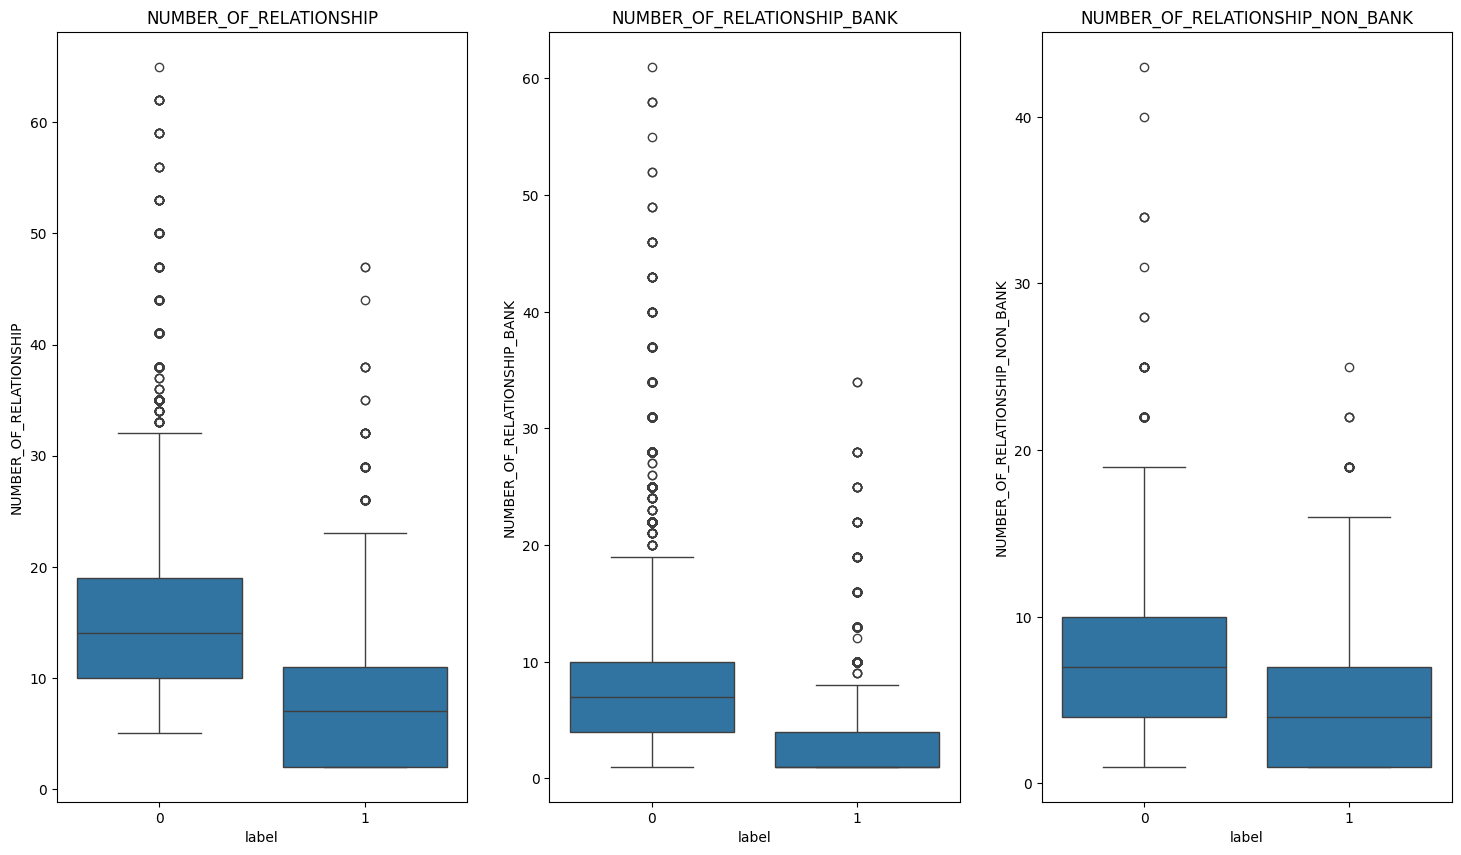

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(x=df['label'], y=df['NUMBER_OF_RELATIONSHIP'], ax=ax[0])
ax[0].set_title('NUMBER_OF_RELATIONSHIP')

sns.boxplot(x=df['label'], y=df['NUMBER_OF_RELATIONSHIP_BANK'], ax=ax[1])
ax[1].set_title('NUMBER_OF_RELATIONSHIP_BANK')

sns.boxplot(x=df['label'], y=df['NUMBER_OF_RELATIONSHIP_NON_BANK'], ax=ax[2])
ax[2].set_title('NUMBER_OF_RELATIONSHIP_NON_BANK')

##### => Những khách hàng có nhiều mối quan hệ với các tổ chức ngân hàng - phi ngân hàng có xu hướng trả nợ đúng hạn hơn.

#### 4. Khách hàng gần đây vừa vay khoản mới có xu hướng tăng mức nợ và có nguy cơ chậm trả nợ cao hơn

In [13]:
df[df['label']==0][['NUM_NEW_LOAN_TAKEN_3M',
       'NUM_NEW_LOAN_TAKEN_6M', 'NUM_NEW_LOAN_TAKEN_9M',
       'NUM_NEW_LOAN_TAKEN_12M']].describe()

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M
count,16356.000000,16356.000000,16356.000000,16356.000000
mean,3.926388,5.937271,7.248288,8.057227
std,2.816875,3.461220,3.863592,4.150681
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000
50%,4.000000,6.000000,7.000000,7.000000
75%,5.000000,7.000000,10.000000,10.000000
max,25.000000,28.000000,46.000000,76.000000


In [14]:
df[df['label']==1][['NUM_NEW_LOAN_TAKEN_3M',
       'NUM_NEW_LOAN_TAKEN_6M', 'NUM_NEW_LOAN_TAKEN_9M',
       'NUM_NEW_LOAN_TAKEN_12M']].describe()

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M
count,3644.000000,3644.000000,3644.000000,3644.000000
mean,2.625960,3.498079,3.964325,4.260977
std,2.483168,3.268352,3.706771,3.966744
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,3.000000,4.000000
75%,4.000000,5.000000,7.000000,7.000000
max,19.000000,22.000000,22.000000,22.000000


Text(0.5, 1.0, 'NUM_NEW_LOAN_TAKEN_12M')

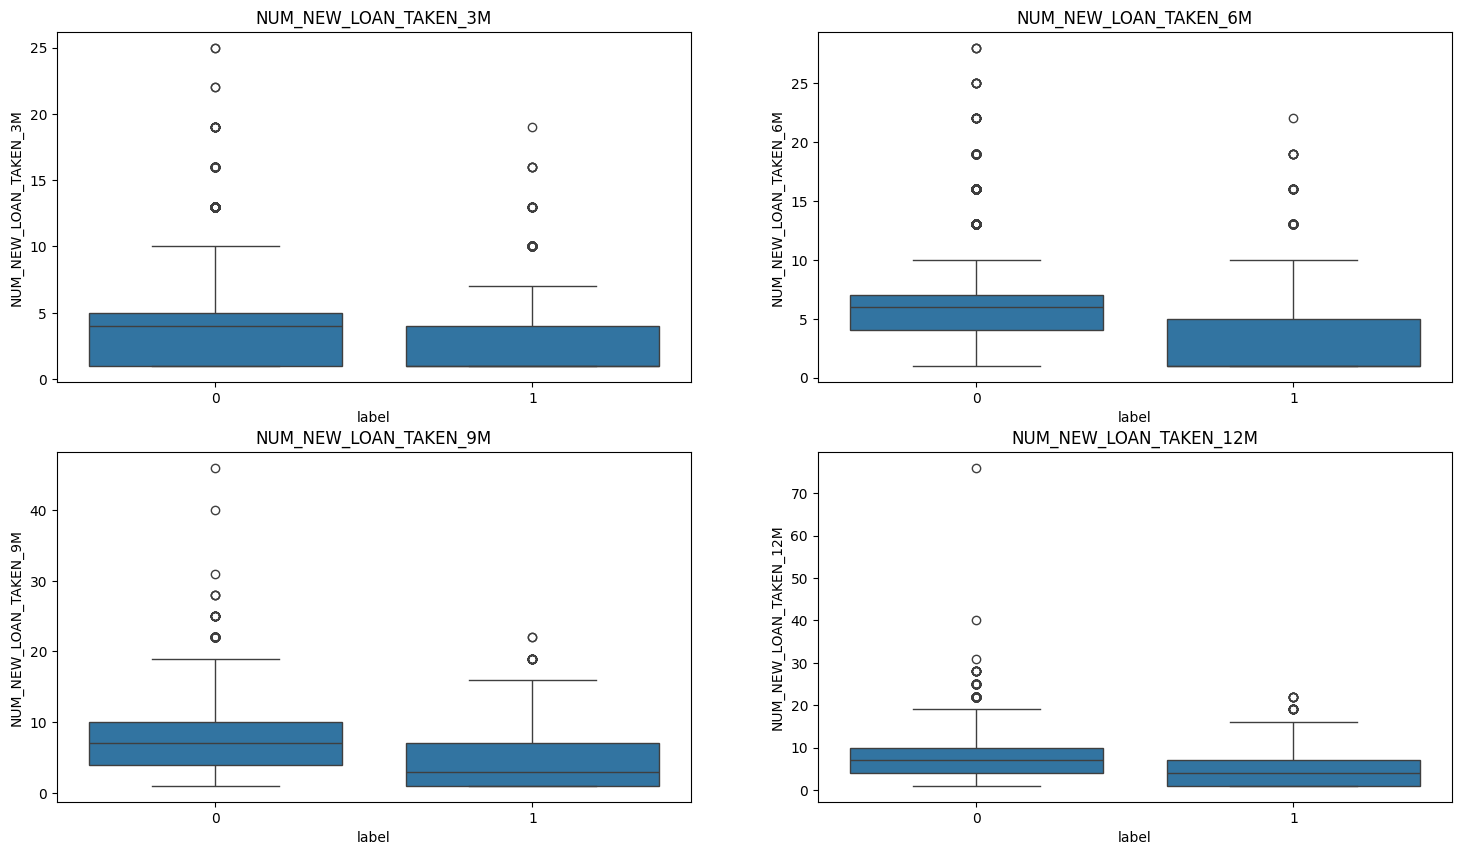

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(x=df['label'], y=df['NUM_NEW_LOAN_TAKEN_3M'], ax=ax[0, 0])
ax[0, 0].set_title('NUM_NEW_LOAN_TAKEN_3M')

sns.boxplot(x=df['label'], y=df['NUM_NEW_LOAN_TAKEN_6M'], ax=ax[0, 1])
ax[0, 1].set_title('NUM_NEW_LOAN_TAKEN_6M')

sns.boxplot(x=df['label'], y=df['NUM_NEW_LOAN_TAKEN_9M'], ax=ax[1, 0])
ax[1, 0].set_title('NUM_NEW_LOAN_TAKEN_9M')

sns.boxplot(x=df['label'], y=df['NUM_NEW_LOAN_TAKEN_12M'], ax=ax[1, 1])
ax[1, 1].set_title('NUM_NEW_LOAN_TAKEN_12M')

##### => Những khách hàng trả nợ đúng hạn có số khoản vay mới từ ngân hàng và các tổ chức phi ngân hàng nhiều hơn

#### 5. Khách hàng có tiền sử chậm trả nợ có thể cũng trễ hạn các khoản nợ tiếp theo ?

#### 6. Khách hàng tìm kiếm nhiều thông tin về các khoản vay hoặc thẻ tín dụng thường có thể gặp rủi ro tài chính và có khả năng trả nợ chậm

In [16]:
df[df['label']==0][['ENQUIRIES_3M', 'ENQUIRIES_6M',
       'ENQUIRIES_9M', 'ENQUIRIES_12M', 'ENQUIRIES_FROM_BANK_3M',
       'ENQUIRIES_FROM_NON_BANK_3M', 'ENQUIRIES_FOR_LOAN_3M',
       'ENQUIRIES_FOR_CC_3M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M', 'ENQUIRIES_FROM_BANK_FOR_CC_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M', 'ENQUIRIES_FROM_BANK_6M',
       'ENQUIRIES_FROM_NON_BANK_6M', 'ENQUIRIES_FOR_LOAN_6M',
       'ENQUIRIES_FOR_CC_6M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_6M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M', 'ENQUIRIES_FROM_BANK_FOR_CC_6M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M', 'ENQUIRIES_FROM_BANK_9M',
       'ENQUIRIES_FROM_NON_BANK_9M', 'ENQUIRIES_FOR_LOAN_9M',
       'ENQUIRIES_FOR_CC_9M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M', 'ENQUIRIES_FROM_BANK_FOR_CC_9M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_9M', 'ENQUIRIES_FROM_BANK_12M',
       'ENQUIRIES_FROM_NON_BANK_12M', 'ENQUIRIES_FOR_LOAN_12M',
       'ENQUIRIES_FOR_CC_12M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_12M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M',
       'ENQUIRIES_FROM_BANK_FOR_CC_12M', 'ENQUIRIES_FROM_NON_BANK_FOR_CC_12M',
       'ENQUIRIES_3M_6M', 'ENQUIRIES_6M_9M', 'ENQUIRIES_9M_12M',
       'ENQUIRIES_6M_12M', 'ENQUIRIES_3M_12M', 'ENQUIRIES_FROM_BANK_3M_6M',
       'ENQUIRIES_FROM_BANK_6M_9M', 'ENQUIRIES_FROM_BANK_9M_12M',
       'ENQUIRIES_FROM_BANK_6M_12M', 'ENQUIRIES_FROM_BANK_3M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_6M_9M',
       'ENQUIRIES_FROM_NON_BANK_9M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_12M']].describe()

,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,...,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M
count,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,...,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000
mean,14.120139,18.792125,23.332600,27.511372,6.049156,10.027880,12.233981,3.830032,4.455246,9.745659,...,3.727745,4.105710,4.384996,3.901504,3.384691,6.545732,6.682869,6.793898,6.494375,6.096539
std,9.611051,15.812678,22.019208,28.305968,8.157193,4.196265,6.158865,4.021294,4.688422,3.519852,...,1.667732,1.812154,1.888041,1.735037,1.510010,0.906608,0.763507,0.613724,0.949037,1.241260
min,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
25%,7.000000,7.000000,9.000000,12.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,7.000000,7.000000,7.000000,6.000000,5.000000
50%,12.000000,12.000000,17.000000,17.000000,2.000000,7.000000,12.000000,2.000000,2.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,17.000000,22.000000,27.000000,33.250000,7.000000,12.000000,15.000000,3.000000,7.000000,12.000000,...,4.000000,6.000000,7.000000,5.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,132.000000,222.000000,317.000000,412.000000,107.000000,67.000000,102.000000,52.000000,87.000000,52.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [17]:
df[df['label']==1][['ENQUIRIES_3M', 'ENQUIRIES_6M',
       'ENQUIRIES_9M', 'ENQUIRIES_12M', 'ENQUIRIES_FROM_BANK_3M',
       'ENQUIRIES_FROM_NON_BANK_3M', 'ENQUIRIES_FOR_LOAN_3M',
       'ENQUIRIES_FOR_CC_3M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M', 'ENQUIRIES_FROM_BANK_FOR_CC_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M', 'ENQUIRIES_FROM_BANK_6M',
       'ENQUIRIES_FROM_NON_BANK_6M', 'ENQUIRIES_FOR_LOAN_6M',
       'ENQUIRIES_FOR_CC_6M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_6M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M', 'ENQUIRIES_FROM_BANK_FOR_CC_6M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M', 'ENQUIRIES_FROM_BANK_9M',
       'ENQUIRIES_FROM_NON_BANK_9M', 'ENQUIRIES_FOR_LOAN_9M',
       'ENQUIRIES_FOR_CC_9M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M', 'ENQUIRIES_FROM_BANK_FOR_CC_9M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_9M', 'ENQUIRIES_FROM_BANK_12M',
       'ENQUIRIES_FROM_NON_BANK_12M', 'ENQUIRIES_FOR_LOAN_12M',
       'ENQUIRIES_FOR_CC_12M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_12M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M',
       'ENQUIRIES_FROM_BANK_FOR_CC_12M', 'ENQUIRIES_FROM_NON_BANK_FOR_CC_12M',
       'ENQUIRIES_3M_6M', 'ENQUIRIES_6M_9M', 'ENQUIRIES_9M_12M',
       'ENQUIRIES_6M_12M', 'ENQUIRIES_3M_12M', 'ENQUIRIES_FROM_BANK_3M_6M',
       'ENQUIRIES_FROM_BANK_6M_9M', 'ENQUIRIES_FROM_BANK_9M_12M',
       'ENQUIRIES_FROM_BANK_6M_12M', 'ENQUIRIES_FROM_BANK_3M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_6M_9M',
       'ENQUIRIES_FROM_NON_BANK_9M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_12M']].describe()

,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,...,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,...,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,12.424533,15.157519,17.322997,19.206092,4.894072,9.561745,10.975851,3.442097,3.759056,9.222283,...,3.228869,3.559550,3.737925,3.477223,3.096048,6.253293,6.329583,6.374588,6.182492,5.949506
std,9.206245,13.820698,17.538623,21.214137,6.792140,5.085843,6.372288,3.570581,3.923453,4.323075,...,1.777117,1.981529,2.073103,1.928670,1.670199,1.562954,1.540662,1.518636,1.587735,1.659343
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,6.000000,5.000000
50%,12.000000,12.000000,12.000000,12.000000,2.000000,7.000000,11.000000,2.000000,2.000000,7.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,17.000000,17.000000,22.000000,22.000000,4.000000,12.000000,12.000000,2.000000,3.000000,12.000000,...,3.000000,5.000000,7.000000,5.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,92.000000,152.000000,207.000000,227.000000,87.000000,57.000000,52.000000,47.000000,42.000000,37.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Text(0.5, 1.0, 'ENQUIRIES_12M')

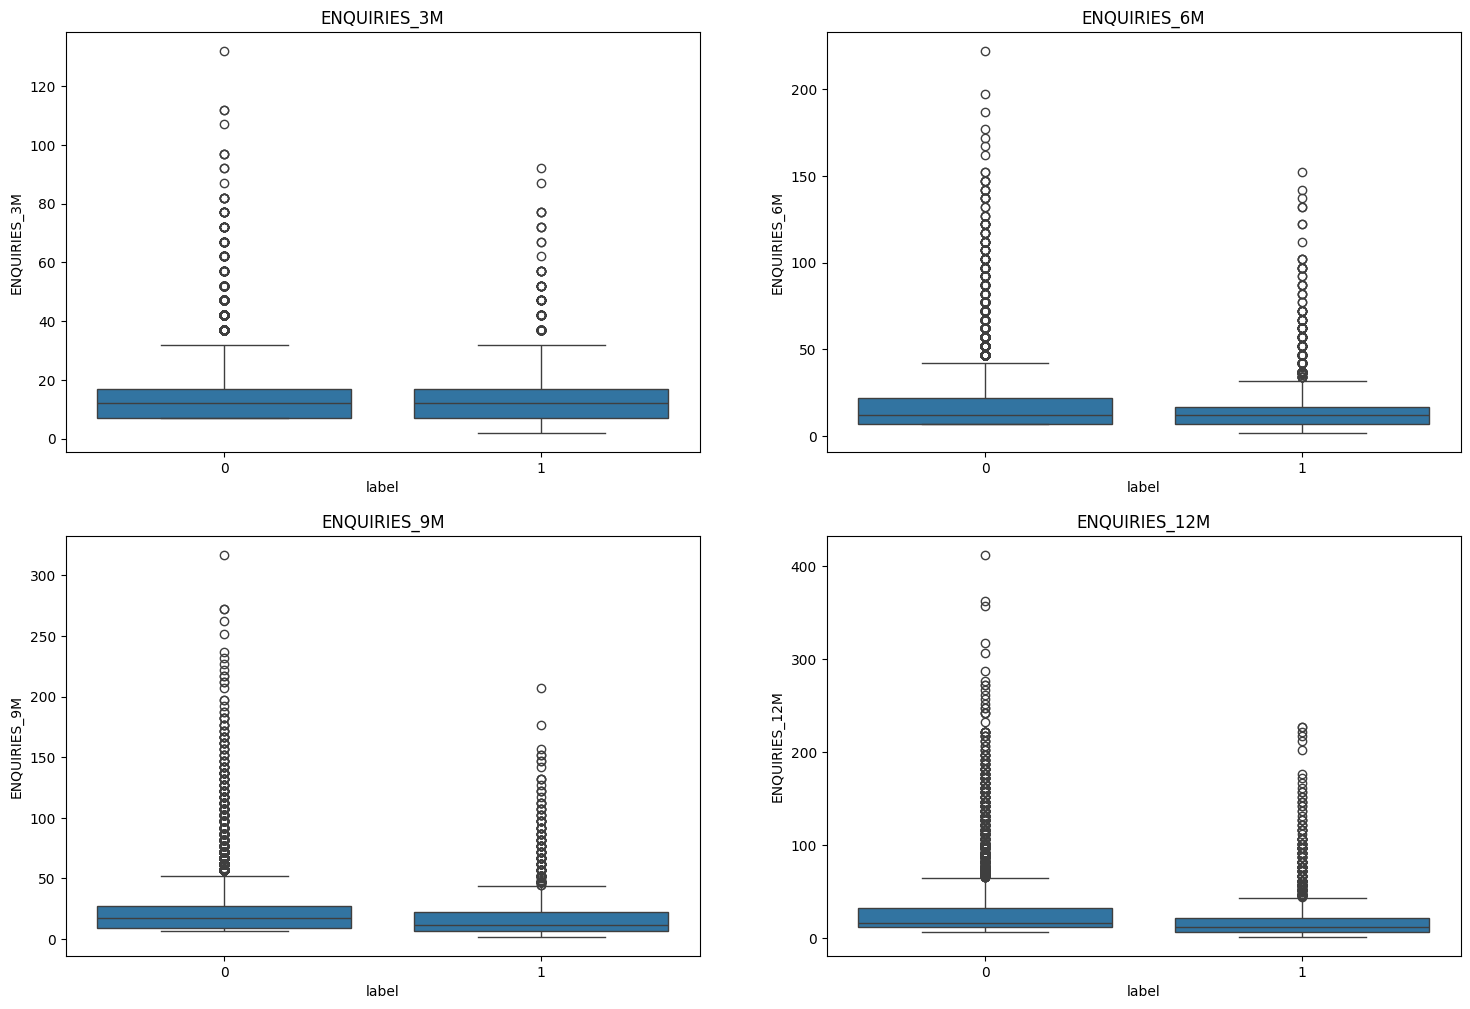

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

sns.boxplot(x=df['label'], y=df['ENQUIRIES_3M'], ax=ax[0, 0])
ax[0, 0].set_title('ENQUIRIES_3M')

sns.boxplot(x=df['label'], y=df['ENQUIRIES_6M'], ax=ax[0, 1])
ax[0, 1].set_title('ENQUIRIES_6M')

sns.boxplot(x=df['label'], y=df['ENQUIRIES_9M'], ax=ax[1, 0])
ax[1, 0].set_title('ENQUIRIES_9M')

sns.boxplot(x=df['label'], y=df['ENQUIRIES_12M'], ax=ax[1, 1])
ax[1, 1].set_title('ENQUIRIES_12M')

##### => Các khách hàng trả nợ đúng hạn có số lượt tra cứu tín dụng nhiều hơn.

#### 7. Khách hàng có dư nợ tăng nhanh, nợ nhiều nên có thể trả nợ không đúng hạn ?

In [19]:
df[df['label']==0][['INCREASING_BAL_3M_ALL',
       'INCREASING_BAL_6M_ALL', 'INCREASING_BAL_3M_LOAN',
       'INCREASING_BAL_6M_LOAN', 'INCREASING_BAL_3M_CC',
       'INCREASING_BAL_6M_CC']].describe()

,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC
count,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04,1.635600e+04
mean,1.000001e+06,1.000000e+06,1.000001e+06,1.000000e+06,9.999984e+05,9.999979e+05
std,3.224928e+00,1.157500e+00,2.721482e+00,9.661905e-01,4.966980e+00,4.188576e+00
min,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05
25%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999995e+05,9.999992e+05
50%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
75%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
max,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06


In [20]:
df[df['label']==1][['INCREASING_BAL_3M_ALL',
       'INCREASING_BAL_6M_ALL', 'INCREASING_BAL_3M_LOAN',
       'INCREASING_BAL_6M_LOAN', 'INCREASING_BAL_3M_CC',
       'INCREASING_BAL_6M_CC']].describe()

,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC
count,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03,3.644000e+03
mean,1.000002e+06,1.000001e+06,1.000002e+06,1.000001e+06,1.000000e+06,9.999997e+05
std,3.750023e+00,3.115145e+00,3.579624e+00,3.108713e+00,4.890248e+00,4.690649e+00
min,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05
25%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
50%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
75%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
max,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06


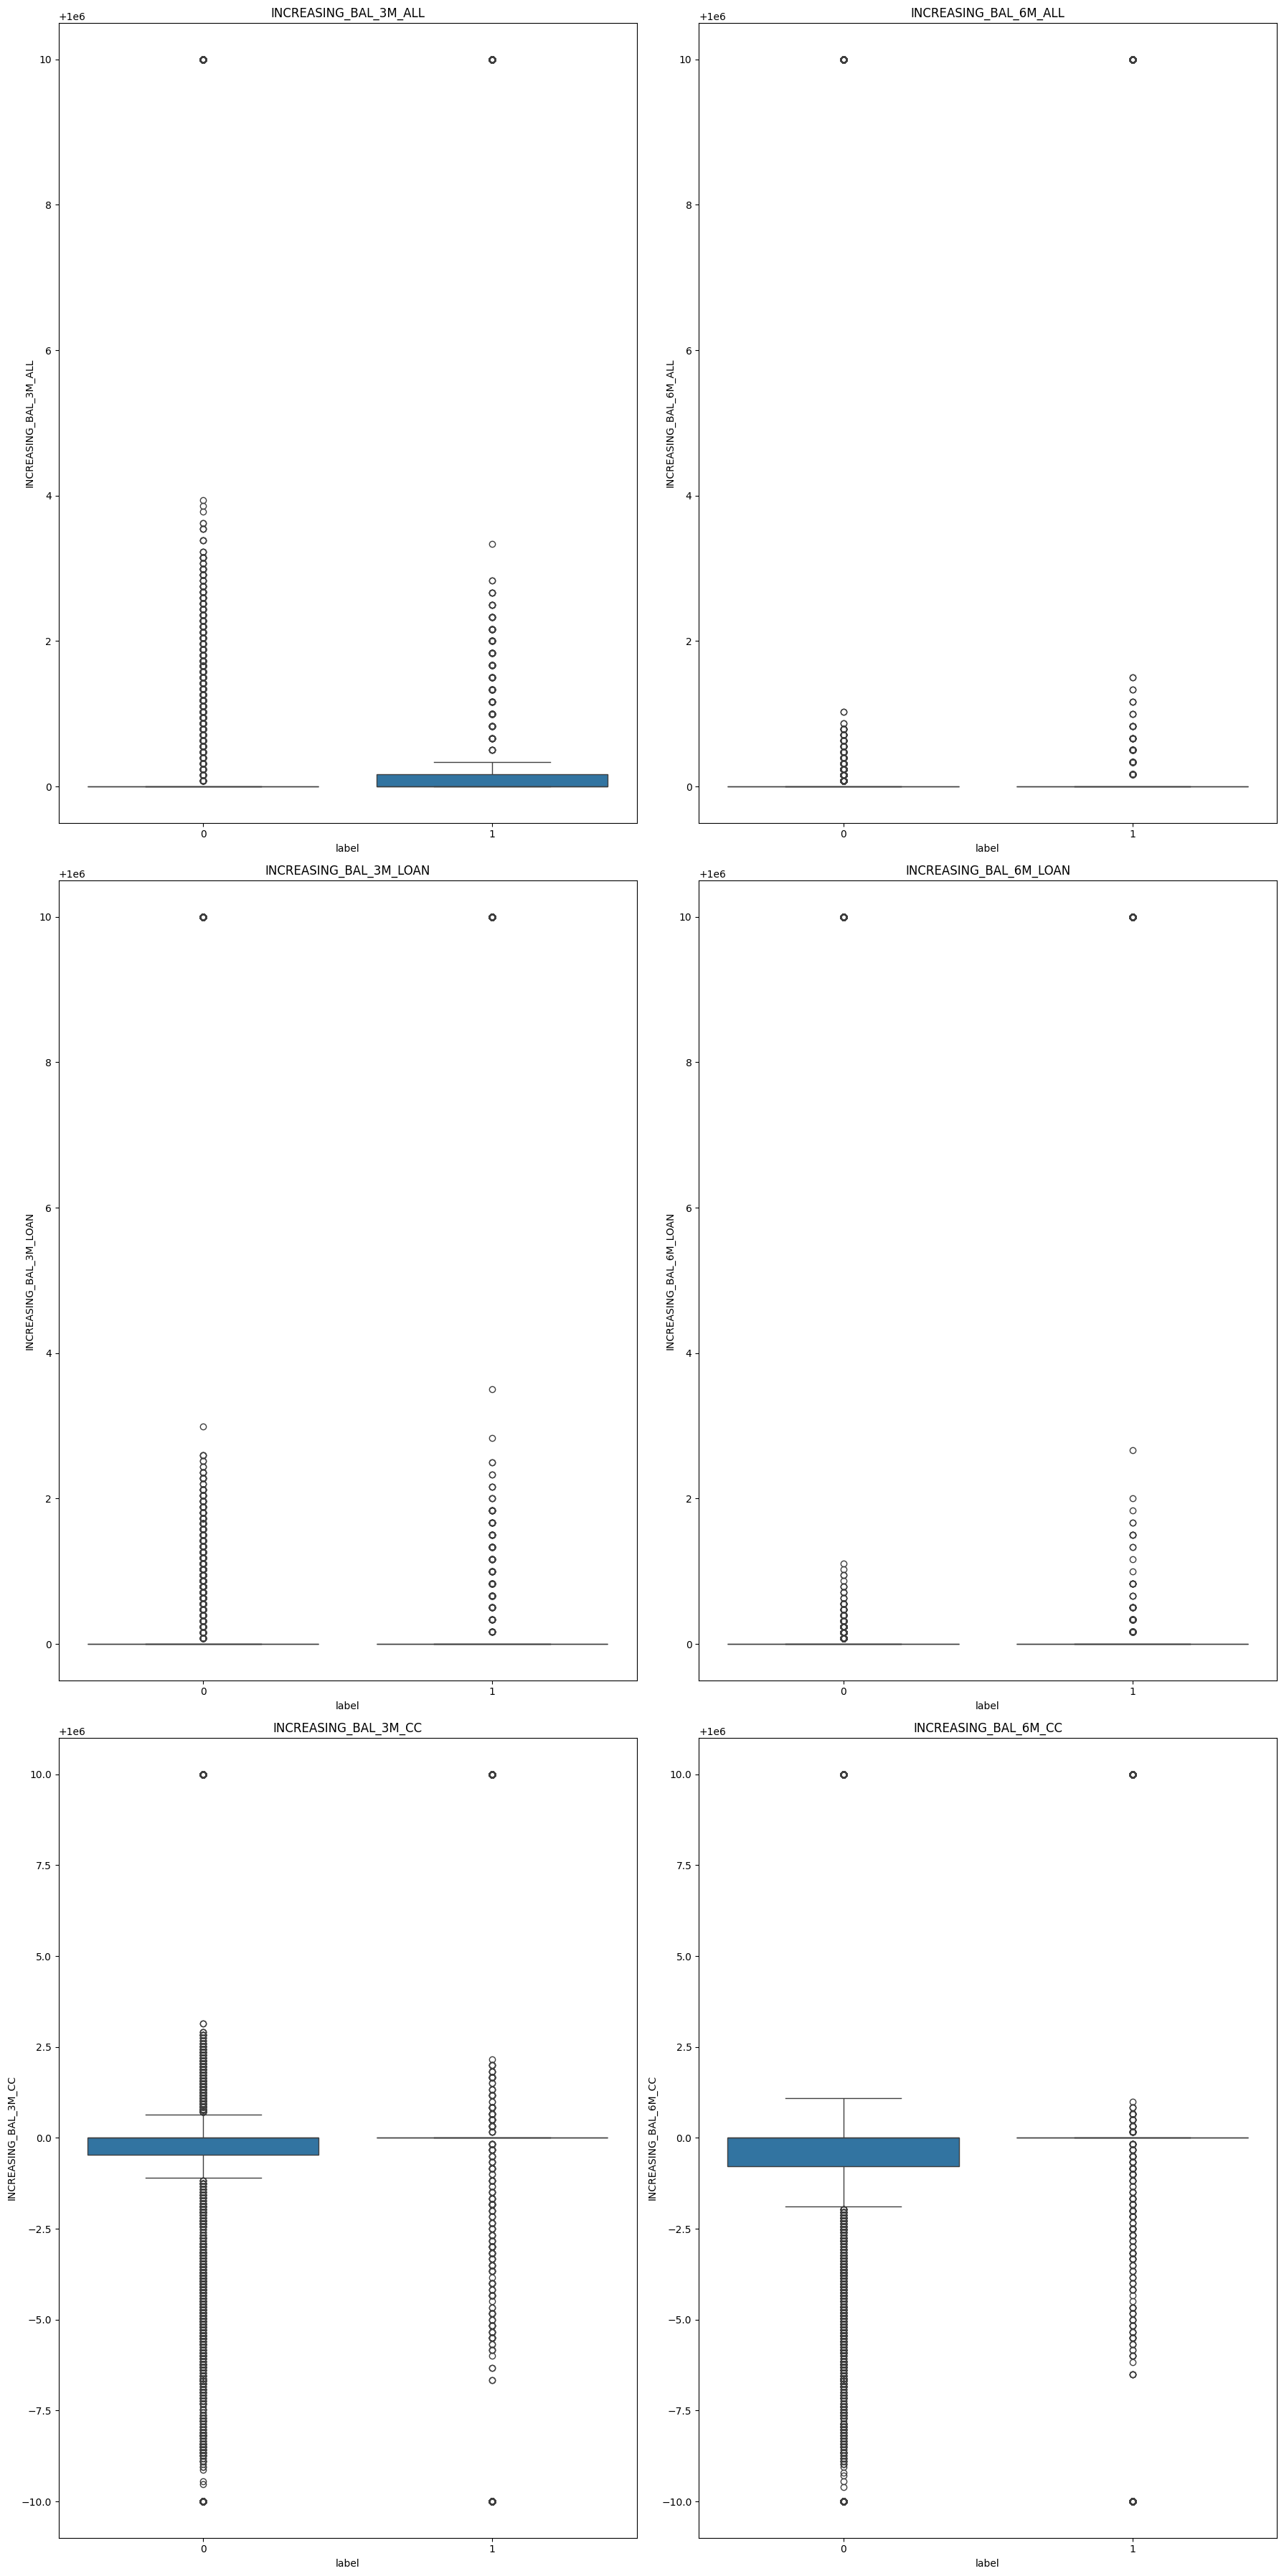

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(18, 36))

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_3M_ALL'], ax=ax[0, 0])
ax[0, 0].set_title('INCREASING_BAL_3M_ALL')

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_6M_ALL'], ax=ax[0, 1])
ax[0, 1].set_title('INCREASING_BAL_6M_ALL')

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_3M_LOAN'], ax=ax[1, 0])
ax[1, 0].set_title('INCREASING_BAL_3M_LOAN')

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_6M_LOAN'], ax=ax[1, 1])
ax[1, 1].set_title('INCREASING_BAL_6M_LOAN')

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_3M_CC'], ax=ax[2, 0])
ax[2, 0].set_title('INCREASING_BAL_3M_CC')

sns.boxplot(x=df['label'], y=df['INCREASING_BAL_6M_CC'], ax=ax[2, 1])
ax[2, 1].set_title('INCREASING_BAL_6M_CC')

plt.tight_layout()
plt.show()

##### => Khách hàng có dư nợ tăng lên nhiều có khả năng trả nợ đúng hạn thấp hơn

#### 8. Khách hàng có thời gian sử dụng thẻ tín dụng lâu, từng thanh toán chậm có thể tiếp tục thanh toán không đúng hạn

In [22]:
df.columns[15:]

Index(['NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK',
       'NUMBER_OF_RELATIONSHIP_NON_BANK', 'NUM_NEW_LOAN_TAKEN_3M',
       'NUM_NEW_LOAN_TAKEN_6M', 'NUM_NEW_LOAN_TAKEN_9M',
       'NUM_NEW_LOAN_TAKEN_12M', 'OUTSTANDING_BAL_LOAN_CURRENT',
       'OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M',
       'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M',
       'OUTSTANDING_BAL_CC_3M', 'OUTSTANDING_BAL_CC_6M',
       'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M',
       'OUTSTANDING_BAL_ALL_3M', 'OUTSTANDING_BAL_ALL_6M',
       'OUTSTANDING_BAL_ALL_9M', 'OUTSTANDING_BAL_ALL_12M',
       'OUTSTANDING_BAL_LOAN_3M_6M', 'OUTSTANDING_BAL_LOAN_6M_9M',
       'OUTSTANDING_BAL_LOAN_9M_12M', 'OUTSTANDING_BAL_LOAN_6M_12M',
       'OUTSTANDING_BAL_LOAN_3M_12M', 'OUTSTANDING_BAL_CC_3M_6M',
       'OUTSTANDING_BAL_CC_6M_9M', 'OUTSTANDING_BAL_CC_9M_12M',
       'OUTSTANDING_BAL_CC_6M_12M', 'OUTSTANDING_BAL_CC_3M_12M',
       'OUTSTANDING_BAL_ALL_3M_6M', 'OUTSTANDING_BAL_ALL_6M

In [23]:
df[df['label']==0][['CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD',
       'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD',
       'CREDIT_CARD_NUMBER_OF_LATE_PAYMENT']].describe()

,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT
count,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000
mean,430.921986,430.947848,430.973710,430.973893,1.682808
std,5.719717,4.683192,3.338873,3.338792,6.051225
min,4.000000,4.000000,4.000000,4.000000,1.000000
25%,431.000000,431.000000,431.000000,431.000000,1.000000
50%,431.000000,431.000000,431.000000,431.000000,1.000000
75%,431.000000,431.000000,431.000000,431.000000,1.000000
max,431.000000,431.000000,431.000000,431.000000,280.000000


In [24]:
df[df['label']==1][['CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD',
       'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD',
       'CREDIT_CARD_NUMBER_OF_LATE_PAYMENT']].describe()

,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,428.155049,429.451701,430.417947,430.527442,1.421789
std,34.035196,25.097966,15.552824,13.915871,3.430047
min,4.000000,4.000000,11.000000,11.000000,1.000000
25%,431.000000,431.000000,431.000000,431.000000,1.000000
50%,431.000000,431.000000,431.000000,431.000000,1.000000
75%,431.000000,431.000000,431.000000,431.000000,1.000000
max,431.000000,431.000000,431.000000,431.000000,100.000000


In [25]:
df.corrwith(df['label']).apply(lambda x: abs(x)).sort_values(ascending=False).head(30)

label                              1.000000
OUTSTANDING_BAL_LOAN_9M_12M        0.416869
OUTSTANDING_BAL_ALL_9M_12M         0.374054
OUTSTANDING_BAL_LOAN_6M_9M         0.370420
NUMBER_OF_LOANS                    0.363330
NUMBER_OF_RELATIONSHIP             0.346098
SHORT_TERM_COUNT                   0.344630
NUM_NEW_LOAN_TAKEN_12M             0.335286
OUTSTANDING_BAL_ALL_6M_9M          0.329230
NUM_NEW_LOAN_TAKEN_9M              0.313821
OUTSTANDING_BAL_LOAN_6M_12M        0.291537
NUMBER_OF_LOANS_NON_BANK           0.273953
OUTSTANDING_BAL_LOAN_3M_6M         0.272104
SHORT_TERM_COUNT_BANK              0.270771
NUMBER_OF_LOANS_BANK               0.268488
NUMBER_OF_RELATIONSHIP_BANK        0.267321
NUM_NEW_LOAN_TAKEN_6M              0.264948
NUMBER_OF_RELATIONSHIP_NON_BANK    0.253833
OUTSTANDING_BAL_ALL_6M_12M         0.245847
INCREASING_BAL_6M_LOAN             0.236300
SHORT_TERM_COUNT_NON_BANK          0.229505
OUTSTANDING_BAL_ALL_3M_6M          0.228558
INCREASING_BAL_6M_ALL           